# Kevin's Pandas' Crib Sheet


## Intro

This is a consolidation notes and examples from:
> Coreys MSchafer's Pandas videos [here](https://www.youtube.com/playlist?list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS) 

and 
> Hands on Data Analysis by xxx

Version 2.0W

## 0. Set-Up 

### 0.1 Initial Imports

In [101]:
import pandas as pd
import numpy as np
import datetime as dt
import pprint

### 0.2 Dataset Constructors

In [102]:
#  Functions that create Example Datasets for use later 

def mk_dictionary(x):
    if x == "people":
        dictionary = {
            'first': ['Corey', 'Jane', 'Janey', 'John', 'Jimmy'], 
            'last': ['Schafer', 'Doe', 'Doe', 'Doe', 'Doe'], 
            'email': ["CoreyMSchafer@gmail.com", 'JaneDoe@email.com', 'JaneyDoe@email.com','JohnDoe@email.com', 'JimmyDoe@email.com']
        }
    
    elif x == 'people2':
        dictionary = {
            'first': ['Tony', 'Steve'], 
            'last': ['Stark', 'Rogers'], 
            'email': ['IronMan@avenge.com', 'Cap@avenge.com']
        }
    
    # Set-up some dirty data  
    elif x == "dirty":
        dictionary = {
            'first': ['Corey', 'Jane', 'John', 'Chris', np.nan, None, 'NA'], 
            'last': ['Schafer', 'Doe', 'Doe', 'Schafer', np.nan, np.nan, 'Missing'], 
            'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com', None, np.nan, 'Anonymous@email.com', 'NA'],
            'age': ['33', '55', '63', '36', None, None, 'Missing']
        }
        
    return dictionary 

def mk_dataframe(x):
    if x == "people":
        df =  pd.DataFrame(mk_dictionary('people'))
    elif x == "people2":
        df =  pd.DataFrame(mk_dictionary('people2'))
    elif x == "dirty":
        df =  pd.DataFrame(mk_dictionary('dirty'))
    return df

people  = mk_dictionary('people')
people2 = mk_dictionary('people2')
# people2 = mk_dictionary('people2')
# people 

# test_dictionary
df = mk_dataframe('people')
df2 = mk_dataframe('people2')
dirty_df = mk_dataframe('dirty')
# df

### 0.3 Bad Chp3 Section 5

In [103]:
# Stuff in here?

### 0.4 DateTime Example 
Don't open it's big

In [104]:
datetime_df = pd.DataFrame(
  {'Date': {0: ('2020-03-13 20:00:00'),
    1: ('2020-03-13 19:00:00'),
    2: ('2020-03-13 18:00:00'),
    3: ('2020-03-13 17:00:00'),
    4: ('2020-03-13 16:00:00'),
    5: ('2020-03-13 15:00:00')},
   'Symbol': {0: 'ETHUSD',
    1: 'ETHUSD',
    2: 'ETHUSD',
    3: 'ETHUSD',
    4: 'ETHUSD',
    5: 'ETHUSD'},
   'Open': {0: 129.94, 1: 119.51, 2: 124.47, 3: 124.08, 4: 124.85, 5: 128.39},
   'High': {0: 131.82, 1: 132.02, 2: 124.85, 3: 127.42, 4: 129.51, 5: 128.9},
   'Low': {0: 126.87, 1: 117.1, 2: 115.5, 3: 121.63, 4: 120.17, 5: 116.06},
   'Close': {0: 128.71, 1: 129.94, 2: 119.51, 3: 124.47, 4: 124.08, 5: 124.85},
   'Volume': {0: 1940673.93,
    1: 7579741.09,
    2: 4898735.81,
    3: 2753450.92,
    4: 4461424.71,
    5: 7378976.0}}
)
datetime_df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
5,2020-03-13 15:00:00,ETHUSD,128.39,128.90,116.06,124.85,7378976.00


## 1.  Making a dataframe

In [105]:
df =  pd.DataFrame(people)                  # These are used on Corry's examples later
df2 = pd.DataFrame(people2)                 # These are used on Corry's examples later
# Load csv in here? bad_df = pd.DataFrame(bad_data)
                                            # Just add new columns
aggregates_df = pd.DataFrame()              # This one is needed for the aggregate examples later
aggregates_df['numeric_data_01'] = \
    np.random.randint(0,100, 125)
aggregates_df['numeric_data_02'] = \
    np.random.randint(0,100, size=len(aggregates_df))

pd.concat([df, aggregates_df], axis=1)      # Merges the 2 dataframes alomng the column (#1) axis 

# df

,first,last,email,numeric_data_01,numeric_data_02
0,Corey,Schafer,CoreyMSchafer@gmail.com,82,99
1,Jane,Doe,JaneDoe@email.com,29,97
2,Janey,Doe,JaneyDoe@email.com,48,69
3,John,Doe,JohnDoe@email.com,3,51
4,Jimmy,Doe,JimmyDoe@email.com,92,68
...,...,...,...,...,...
120,NaN,NaN,NaN,21,38
121,NaN,NaN,NaN,63,29
122,NaN,NaN,NaN,36,15
123,NaN,NaN,NaN,55,2


## 2. Quick Overview of the Data 

In [106]:
# df.info()             # Overview of the dataframe
# df.columns            # List column names
# df.head(10)           # List top x rows (default is 5)
# df.tail()             # List bottom x rows (default is 5)
# df.sample()           # List randon x rows (default is 1)
# df.describe()         # Quick summart of the frame, best for wide format


## 3. Indexes


In [107]:
# Set a new index. Keep it set with `inplace``.  
# Indexes don't have to be unique
df.set_index('email', inplace=True)     # Set a column to be an index
print(df.index)
df.reset_index(inplace=True)            # Reset row indexes to (hand to 'save'a column used a an index)

Index(['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JaneyDoe@email.com',
       'JohnDoe@email.com', 'JimmyDoe@email.com'],
      dtype='object', name='email')


## 4. Accessing Data 

In [108]:
# df                                # Simple access
# df['email']                       # Access single column
# df[['last', 'email']]             # Access multiple columns by using a list (a list within the list)i

# df.iloc[[0, 1], 2]                # Access by integer reference / index by using .iloc.  .loc and iloc takes row index first

# df.loc['CoreyMSchafer@gmail.com', 'last'] # Access by row index name .loc
# df.loc[[0, 1], ['email', 'last']] # As above plus selected columns 

## 5. Selecting Data


### 5.1 Filters 

Best to filter with 2 part process:
1. Set filter 
2. Apply filter

_But can't use word "filter" as a variable name it's reserved_

In [109]:
filt = (df['last'] == 'Schafer') | (df['first'] == 'John')  # 1) Set filter.  An exampe of an 'or' '|' filter
df.loc[filt, 'email']                                       # 2) Apply filter or
# df.loc[~filt, 'email']                                    # 2) Apply inverse of filter

0    CoreyMSchafer@gmail.com
3          JohnDoe@email.com
Name: email, dtype: object

## 6. Updating Values

### 6.1 Update Column Names


In [110]:
# df.columns = ['email', 'first_name', 'last_name']         # Rename all columns 

# df.rename(                                                # Rename specific columns using .rename
#     columns={
#         'first_name': 'first', 'last_name': 'last'
#         }, inplace=True                                   # Note, need "inplace" 
#     ) 
 
# df.columns = [x.upper() for x in df.columns]              # Rename all columns by an inline comprehension .columns

# Reset
df.columns = [x.lower() for x in df.columns]                # Reset so later examples work
df

,email,first,last
0,CoreyMSchafer@gmail.com,Corey,Schafer
1,JaneDoe@email.com,Jane,Doe
2,JaneyDoe@email.com,Janey,Doe
3,JohnDoe@email.com,John,Doe
4,JimmyDoe@email.com,Jimmy,Doe


### 6.2 Update Values - Direct Updates

In [111]:
df['email'] = df['email'].str.lower()                               # Update whole column with string object method with.str.x
df.loc[3] = ['John2Smith@email.com', 'John2', 'Smith']              # Update whole row with .loc
df.loc[2, ['last', 'email']] = ['Smith', 'janeysmith@email.com']    # Update specific columns of a row with .loc

# Update based on filter 
filt = (df['email'] == 'John2Smith@email.com')                      # Update cells based on a filter with .loc
# df[filt]['last'] = 'Smith'                                        # DON'T do this, it won't work
df.loc[filt, 'first'] = 'Johnny'                                    # THIS will, need .loc

df

,email,first,last
0,coreymschafer@gmail.com,Corey,Schafer
1,janedoe@email.com,Jane,Doe
2,janeysmith@email.com,Janey,Smith
3,John2Smith@email.com,Johnny,Smith
4,jimmydoe@email.com,Jimmy,Doe


### 6.3 Updating Values - with Functions 

Four Functions:
- `apply`
- `map`
- `applymap` &
- `replace`

#### 6.3.1 `apply` a function to an object (dataframe or series) and get a series as a result
- Object can be a series (by default a column) 
- Object can be a dataframe in which case it's applied to each series (column) for a single result for each


In [112]:
# Applying to a column
# df['email'].apply(len)            # `apply` the `len` function to the email column

# def update_email(email):          # 'apply' your own function
#     return email.upper()
# df['email'].apply(update_email) 

# df['email'].apply(                # 'Apply' a your own inline (LAMBDA) function 
#     lambda x: x.lower()           # to a whole column and get a series as a result
#     )  

# When applied to a dataframe 'apply' is applied across each series
df.apply(len) # or df.apply(len, axis='columns') or df.apply(len, axis='rows')   
# df.apply(pd.Series.min)           # Returns the minimum (first in alaphs) in each column

# df.apply(                           # Applying a Lambda function to each series
#     lambda x: x.min()
#     )     


email    5
first    5
last     5
dtype: int64

#### 6.3.2 `applymap` a function to a dataframe and get a dataframe as a result.  
Applied elementwise


In [113]:
# df.applymap(len)
df.applymap(str.lower)

,email,first,last
0,coreymschafer@gmail.com,corey,schafer
1,janedoe@email.com,jane,doe
2,janeysmith@email.com,janey,smith
3,john2smith@email.com,johnny,smith
4,jimmydoe@email.com,jimmy,doe


#### 6.3.3 `map` a series and get a series as a result.  
Replaces __all__ elements in series  

In [114]:
# .map only works on a series. Use like a vlookup
# Use it to subsitute one value for another via a lookup dictionary.
# Unsubtituted vales replaced by NaN
df['first'].map({'Corey': 'Chris', 'Jane': 'Mary'})

0    Chris
1     Mary
2      NaN
3      NaN
4      NaN
Name: first, dtype: object

#### 6.3.4 `replace` a series and get series result

In [115]:
# .replace works like map but leaves unsubsittuted values untouched (not NaN)
df['first'] = df['first'].replace({'Corey': 'Corey2', 'Jane': 'Jane2'})
df

,email,first,last
0,coreymschafer@gmail.com,Corey2,Schafer
1,janedoe@email.com,Jane2,Doe
2,janeysmith@email.com,Janey,Smith
3,John2Smith@email.com,Johnny,Smith
4,jimmydoe@email.com,Jimmy,Doe


## 7. Updating Shape

### 7.1 Columns

#### 7.1.1 Adding Columns

In [116]:
# Can't use . notation as pandas would look for method

# Create multiple columns at once 
# df[['first', 'last']] = df['full_name'].str.split(' ', expand=True)

# Creating a new column with strings, can use numeric as well with .apply 
df['full_name'] = df['first'] + ' ' + df['last']

# Split data with str.split.  Splits on space by default so not needed
# would give list by default, need expand=True to make 2 new columns in dataframe
df['full_name'].str.split(' ', expand=True)

df

,email,first,last,full_name
0,coreymschafer@gmail.com,Corey2,Schafer,Corey2 Schafer
1,janedoe@email.com,Jane2,Doe,Jane2 Doe
2,janeysmith@email.com,Janey,Smith,Janey Smith
3,John2Smith@email.com,Johnny,Smith,Johnny Smith
4,jimmydoe@email.com,Jimmy,Doe,Jimmy Doe


#### 7.1.2 Dropping Columns

In [117]:
# Remove columns with .drop like a db
df.drop(columns=['first', 'last'], inplace=True)
df

,email,full_name
0,coreymschafer@gmail.com,Corey2 Schafer
1,janedoe@email.com,Jane2 Doe
2,janeysmith@email.com,Janey Smith
3,John2Smith@email.com,Johnny Smith
4,jimmydoe@email.com,Jimmy Doe


### 7.2 Rows

#### 7.2.1 Adding Rows

In [118]:
# Adding a single row with .append
# df.append({'first': 'Tony'}, ignore_index=True) # insert new row even if no index given: ignore_index=True

# Now deprecated:
df2 = pd.DataFrame({'first': ['Tony']})
pd.concat([df, df2])

,email,full_name,first
0,coreymschafer@gmail.com,Corey2 Schafer,NaN
1,janedoe@email.com,Jane2 Doe,NaN
2,janeysmith@email.com,Janey Smith,NaN
3,John2Smith@email.com,Johnny Smith,NaN
4,jimmydoe@email.com,Jimmy Doe,NaN
0,NaN,NaN,Tony


#### 7.2.2 Dropping Rows


In [119]:
df.drop(index=3, inplace=True)              # Deleteing a row with .drop

filt = df['full_name'] == 'Jane2 Doe'                # Dropping rows based on values.  This case index
df.drop(index=df[filt].index, inplace=True)


In [120]:
# Deleting rows based on values 


### 7.3 Dataframes

In [121]:
df1 = pd.concat([df, df2], ignore_index=True, sort=False) # Adding a whole new dataframe as new rows
df

,email,full_name
0,coreymschafer@gmail.com,Corey2 Schafer
2,janeysmith@email.com,Janey Smith
4,jimmydoe@email.com,Jimmy Doe


## 8. Sorting

### 8.1 Sort a Series 

In [122]:
df['email'].sort_values()    # Sort a series (column) with .sort_values 

0    coreymschafer@gmail.com
2       janeysmith@email.com
4         jimmydoe@email.com
Name: email, dtype: object

### 8.2 Sort a Dataframe

In [123]:
# df.sort_values(by='email', ascending=False)   # Sort a dataframe by a single column with sort_values

df.sort_values(                                 # Sort a dataframe by a multiple columnsin a list with .sort_values
    by=['email', 'full_name'], 
    ascending=False)  

# df.sort_values(                               # Sort a dataframe by a multiple columns in a list with .sort_values 
#     by=['email', 'full_name'],                # and different asending attrbutes from a list and make perm with inpace 
#     ascending=[False, True], 
#     inplace=True  
#     )

df.sort_index()                               # Reset the order based on the "original" index with .sort_index

,email,full_name
0,coreymschafer@gmail.com,Corey2 Schafer
2,janeysmith@email.com,Janey Smith
4,jimmydoe@email.com,Jimmy Doe


## 9. Aggregates

In [124]:
# aggregates_df[[                                     # Use aggregation functuins, such as:
#     'numeric_data_01', 'numeric_data_02']].median() # mean, mode, standard deviation on a simgle column

# aggregates_df['numeric_data_01'].count()            # count the number of populated fields in a column with .count

# aggregates_df['numeric_data_01'].value_counts()     # count the number of eachvalue with .value_counts 

# aggregates_df['numeric_data_01'].value_counts(        # or to get a percentage use the normalise=True attribute
#     normalize=True)*100

## 10. Groups


### 10.0 Reset Dataframes

In [125]:
df = mk_dataframe('people')
df = pd.merge(df, aggregates_df, left_index=True, right_index=True)
# df = pd.concat([df, aggregates_df], axis = 1)
df

,first,last,email,numeric_data_01,numeric_data_02
0,Corey,Schafer,CoreyMSchafer@gmail.com,82,99
1,Jane,Doe,JaneDoe@email.com,29,97
2,Janey,Doe,JaneyDoe@email.com,48,69
3,John,Doe,JohnDoe@email.com,3,51
4,Jimmy,Doe,JimmyDoe@email.com,92,68


### 10.1 Working with Groups

In [126]:
# Create a group in a similar way as we created a filter, but with .groupby([column_name])
# This gives you a group object, indexed by the group rather than true / galse list of a filter
grp_last = df.groupby(['last'])
grp_last.groups                # KT added to see groups and indexes

# Then apply methods to the group in a 2nd step, e.g., .get_group 
grp_last.get_group('Doe')

# Apply a function (.value_counts) to a column after already being grouped
# Can filter furtther with .loc makes it loke usiong a filter
# Can also get percentage like above with (normalize=True)*100
grp_last['first'].value_counts() #.loc['Smith']

# Can retrive multiple columns and perform other aggregate functions with their methods 
grp_last[['numeric_data_01', 'numeric_data_02']].median() #.loc[['Smith' , 'Doe']]

# *** Or use more generic form to apply multiple aggregated functions with .agg ***
# Seems most generic to me!!!
grp_last[['numeric_data_01', 'numeric_data_02']].agg(['count', 'mean', 'std']) #.loc[['Smith' , 'Doe']]

# Counting rows with filter.  Counts true's in the returned series with .sum
filt = df['last'] == 'Doe'
df.loc[filt]['first'].str.contains('Jane').sum()

# But for a group need to .apply the function to all the group's series 
grp_last['first'].apply(lambda x: x.str.contains('n').sum())

last
Doe        3
Schafer    0
Name: first, dtype: int64

### 10.2 Calculating Percentages

In [127]:
# How to find the percentage with an n in their first name and group by surname

# Create a series of the number of people with each surname
surname_count = df['last'].value_counts()
surname_count

# Create a series of people with each surname, with 'n' in first name
surname_count_with_n = grp_last['first'].apply(lambda x: x.str.contains('n').sum())
surname_count_with_n

# Merge the 2 series togther, add and calculate the percentage (answer column) and tidy up column names
df_with_n = pd.concat([surname_count, surname_count_with_n], axis='columns', sort=False)
df_with_n['percentage'] = df_with_n['first']/df_with_n['last']*100
df_with_n.rename(columns={'first': 'First_with_an_n', 'last': 'Surname'}, inplace=True)
df_with_n.sort_values('percentage', ascending=False)
# df_with_n.loc['Smith']

,Surname,First_with_an_n,percentage
Doe,4,3,75.0
Schafer,1,0,0.0


## 11. Cleaning 

### 11.1 Checking for Dirty Data


In [128]:
# Checking for Nulls
# dirty_df.isna().sum()                             # Identify na values (by getting a mask) rather than drop them with .isna
# # or
# dirty_df.isna()

# Checking for wrong Types
dirty_df.dtypes                                    # Identify if data type is correct. 
                                                    # If numeric are wrong many aggrate functions won't work 

first    object
last     object
email    object
age      object
dtype: object

### 11.2 Replacing Dirty Data  

In [129]:
# Replacing Nulls
dirty_df.replace('NA', np.nan, inplace=True)          # Replace unusual 'nill' values (in these cases 'NA' & 'Missing') 
dirty_df.replace('Missing', np.nan, inplace=True)     # with the proper np.nan value across whole data frame
# Could do all this at import time for csv pd.read_csv(XXXXX..., na_values=['NA','None'])

dirty_df.fillna(0)                                    # Replaces np.nan  values with an actual value. Most usful for NUMERIC data

# Replacing Bad Types
# dirty_df['age'] = df['age'].astype(float)             # Casting a column to the correct data type with .astype
                                                        # Can use .astype on whole dataframe too.
                                                        # Use float not int, as NaN is a float.

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,0,36
4,0,0,0,0
5,0,0,Anonymous@email.com,0
6,0,0,0,0


### 11.3 Dropping Dirty Data

In [130]:
# dirty_df.dropna()                                 # Drop any / all _rows_ that aren't totally complete with .dropna & how = 'any'
                                                    # default values are: dirty_df.dropna(axis='index', how='any')

# dirty_df.dropna(                                  # Drop rows that have missing data in 'any' specified rows with subset=[]
    # axis='index', how='any', 
    # subset=['last', 'email'])

# dirty_df.dropna(axis='columns')                   # Drop incomplete _columns_.  Which is all of them due to row 4

# dirty_df

## 12. Datetime 

### 12.1 Making a Column Datetime


In [131]:
# datetime_df['Date'] = \
#     pd.to_datetime(datetime_df['Date'])     # Apply the pandas to_datetime function to a column             

datetime_df['Date'] = \
    datetime_df['Date'].apply(pd.to_datetime)# Same as above

# Can do at import time if prefered
datetime_df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
5,2020-03-13 15:00:00,ETHUSD,128.39,128.90,116.06,124.85,7378976.00


### 12.2 Using Datetime Values

In [132]:
# datetime_df.loc[0, 'Date'].day_name()   # To find the day name of a single datetime

# datetime_df['DayOfWeek'] =\
#     datetime_df['Date'].dt.day_name()   # New column comtaining day name with .dt.day_name()

# Some self explanatory date functions
# print(datetime_df['Date'].min())
# print(datetime_df['Date'].max())
# print(datetime_df['Date'].max() - datetime_df['Date'].min()) # Known as time delta

# Filtering on date range in str converted to a datetime with .to_datetime
filt = (
    datetime_df['Date'] >= pd.to_datetime('2020-03-13 16:00:00')) & (
    datetime_df['Date'] < pd.to_datetime('2020-03-13 18:00:00'))

datetime_df.loc[filt]
# datetime_df


,Date,Symbol,Open,High,Low,Close,Volume
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


### 12.3 Using Datetime as an Index

In [161]:
# datetime_df.set_index('Date', inplace=True)       # Setting date column as an index for later functions

# datetime_df.loc['2020-03-13 16:00']               # Single value slice on index with .loc

# datetime_df.loc[                                  # Slice on index with .loc and for range :
#     '2020-03-13 17:00':'2020-03-13 19:00']                    

# datetime_df.loc[
#     '2020-03-13 17:00':'2020-03-13 19:00'][        # Get an aggregate value of a column sliced by date 
#     'Close'].mean()    

# datetime_df['High'].resample('D').max()         # Resample (downsample) a range using 'D' for day and .resample
# datetime_df

132.02

## 13. Plots

c:\Users\kthompso\Miniconda3\envs\c3.10.4\lib\site-packages\pandas\plotting\_matplotlib\core.py:1244: UserWarning: Attempting to set identical left == right == 18334.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


<AxesSubplot:xlabel='Date'>

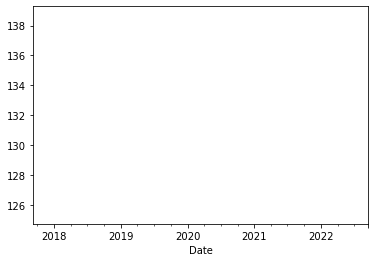

In [162]:
# Quick line plot with mathplot & a Magic command needed for Jupyter notebook
%matplotlib inline 
highs.plot()

In [ ]:
# Resample whole dataframe with single aggregation method
df.resample('W').mean()

In [ ]:
# Resample whole dataframe with diferent aggregations with a map & .agg method
df.resample('W').agg({'Close': 'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'})

In [ ]:
# Lesson 10 - Date Time Series
# Can use ,format= if .to_datetime doesn't auto recognise the date / time format
df = pd.read_csv('time_series.csv')
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')
df.dtypes

## XX.  To File

### From Chap 3 Section 5
Cleaning, handling duplicate, missing or invalid data

In [ ]:
df.info()           # Will show missing values (nulls) and data types
# df.describe()       # This will show some errors up in the dataset, eg unreasonably large or small

pd.DataFrame({      # Really nice way to gather summary stats for targeted rows into a data frame
    'np.inf Snow Depth': df[df.SNWD == np.inf].SNOW.describe(),
    '-np.inf Snow Depth': df[df.SNWD == -np.inf].SNOW.describe()
}).T                # Note the .T to transpose the results

df.describe(include='object')   # Check the descripbe for datetime and others

df[df.duplicated(['date', 'station'])]  # Returns the rows (after the first) that 
                                        # are duplicated in the columns mentioned


Use merge, which is an inner join by default:

pd.merge(df1, df2, left_index=True, right_index=True)
Or join, which is a left join by default:

df1.join(df2)
Or concat), which is an outer join by default:

pd.concat([df1, df2], axis=1)